In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import recall_score, roc_auc_score


In [ ]:
# Load the dataset
df = pd.read_csv('loan_data.csv')

In [ ]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [ ]:
print(df.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0             

In [ ]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     4720
AMT_REQ_CREDIT_BUREAU_WEEK    4720
AMT_REQ_CREDIT_BUREAU_MON     4720
AMT_REQ_CREDIT_BUREAU_QRT     4720
AMT_REQ_CREDIT_BUREAU_YEAR    4720
Length: 122, dtype: int64


In [ ]:
# Handle missing values by dropping rows with any NaN values
df_cleaned = df.dropna()

# Alternatively, you could fill missing values with mean/median if needed:
# df_cleaned = df.fillna(df.mean())  # For numerical columns

In [ ]:
# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)  # drop_first to avoid multicollinearity

In [ ]:
# Split the data into features and target
X = df_encoded.drop('TARGET', axis=1)  # Replace 'TARGET' with the correct column name
y = df_encoded['TARGET']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8010 - loss: 0.4784 - val_accuracy: 0.9221 - val_loss: 0.2644
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9217 - loss: 0.2599 - val_accuracy: 0.9221 - val_loss: 0.2599
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - loss: 0.1842 - val_accuracy: 0.9221 - val_loss: 0.2591
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9331 - loss: 0.1694 - val_accuracy: 0.9221 - val_loss: 0.2590
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9420 - loss: 0.1388 - val_accuracy: 0.9221 - val_loss: 0.2609
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9457 - loss: 0.1247 - val_accuracy: 0.9221 - val_loss: 0.2681
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9523 - loss: 0.1008 - val_accuracy: 0.9221 - val_loss: 0.2750
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9628 - loss: 0.0870 - val_accuracy: 0.9221 - val_loss

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)  # Predict probabilities

# Convert probabilities to binary class labels (0 or 1) using threshold 0.5
y_pred_class = (y_pred > 0.5).astype(int)

# Check for missing values in predictions
print("Missing values in predictions:", pd.isnull(y_pred_class).sum())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Missing values in predictions: 0


In [ ]:
# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_class)
print(f"Sensitivity: {sensitivity:.2f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc:.2f}")


Sensitivity: 0.00
AUC-ROC: 0.54


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert classes to numpy array
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)

# Convert the class weights into a dictionary for training
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Train the model with class weights
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict  # Apply class weights here
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9885 - loss: 0.1721 - val_accuracy: 0.7987 - val_loss: 0.3944
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9487 - loss: 0.1264 - val_accuracy: 0.8571 - val_loss: 0.3340
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9977 - loss: 0.0804 - val_accuracy: 0.8442 - val_loss: 0.3596
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - loss: 0.0565 - val_accuracy: 0.8571 - val_loss: 0.3565
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0354 - val_accuracy: 0.8636 - val_loss: 0.3746
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9946 - loss: 0.0327 - val_accuracy: 0.8636 - val_loss: 0.3909
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9994 - loss: 0.0183 - val_accuracy: 0.8701 - val_loss: 0.4020
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0166 - val_accuracy: 0.8701 - val_loss:

In [ ]:
# Example of changing the architecture with more layers and neurons
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model with a different learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a different batch size
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5421 - loss: 0.6883 - val_accuracy: 0.9221 - val_loss: 0.3377
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9176 - loss: 0.3084 - val_accuracy: 0.9221 - val_loss: 0.3041
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9384 - loss: 0.2308 - val_accuracy: 0.9221 - val_loss: 0.3166
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9252 - loss: 0.2415 - val_accuracy: 0.9221 - val_loss: 0.3002
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9447 - loss: 0.1683 - val_accuracy: 0.9221 - val_loss: 0.2991
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9372 - loss: 0.1606 - val_accuracy: 0.9221 - val_loss: 0.3072
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9244 - loss: 0.1530 - val_accuracy: 0.9221 - val_loss: 0.3194
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9516 - loss: 0.1058 - val_accuracy: 0.9221 - val_loss: 0.3392
Ep

Precision: 0.00
F1-Score: 0.00


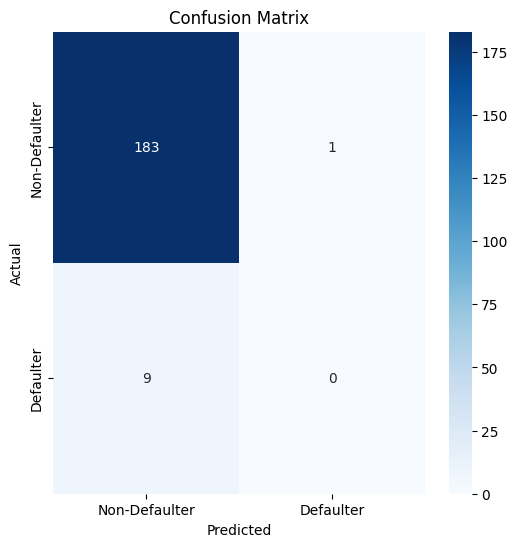

In [ ]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Precision
precision = precision_score(y_test, y_pred_class)
print(f"Precision: {precision:.2f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Defaulter", "Defaulter"], yticklabels=["Non-Defaulter", "Defaulter"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


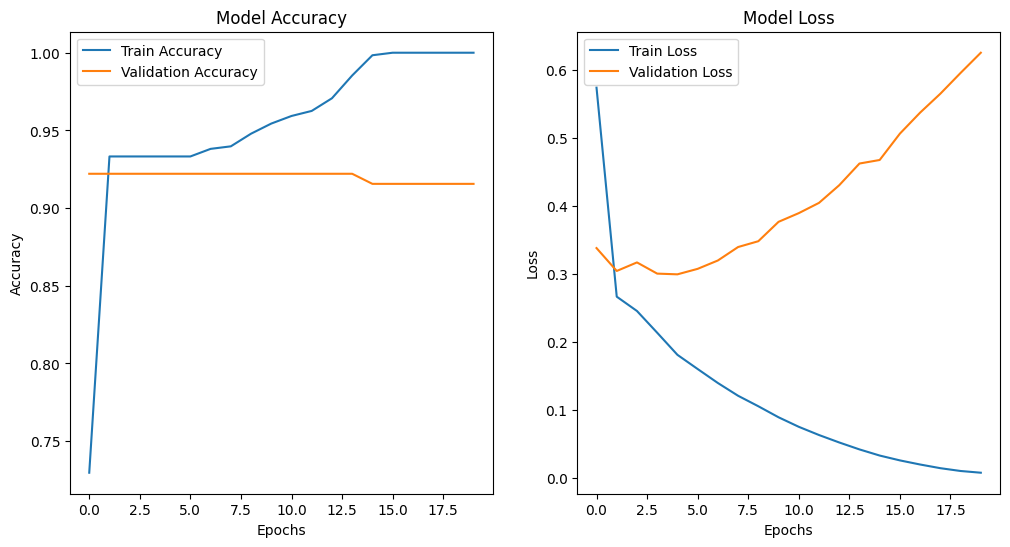

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
